11490434/11490434 [==============================] - 0s 0us/step


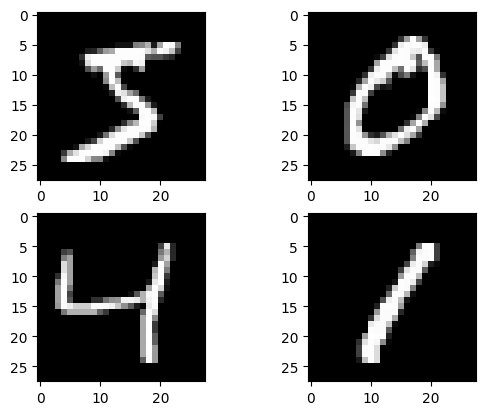

In [ ]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))

plt.show()


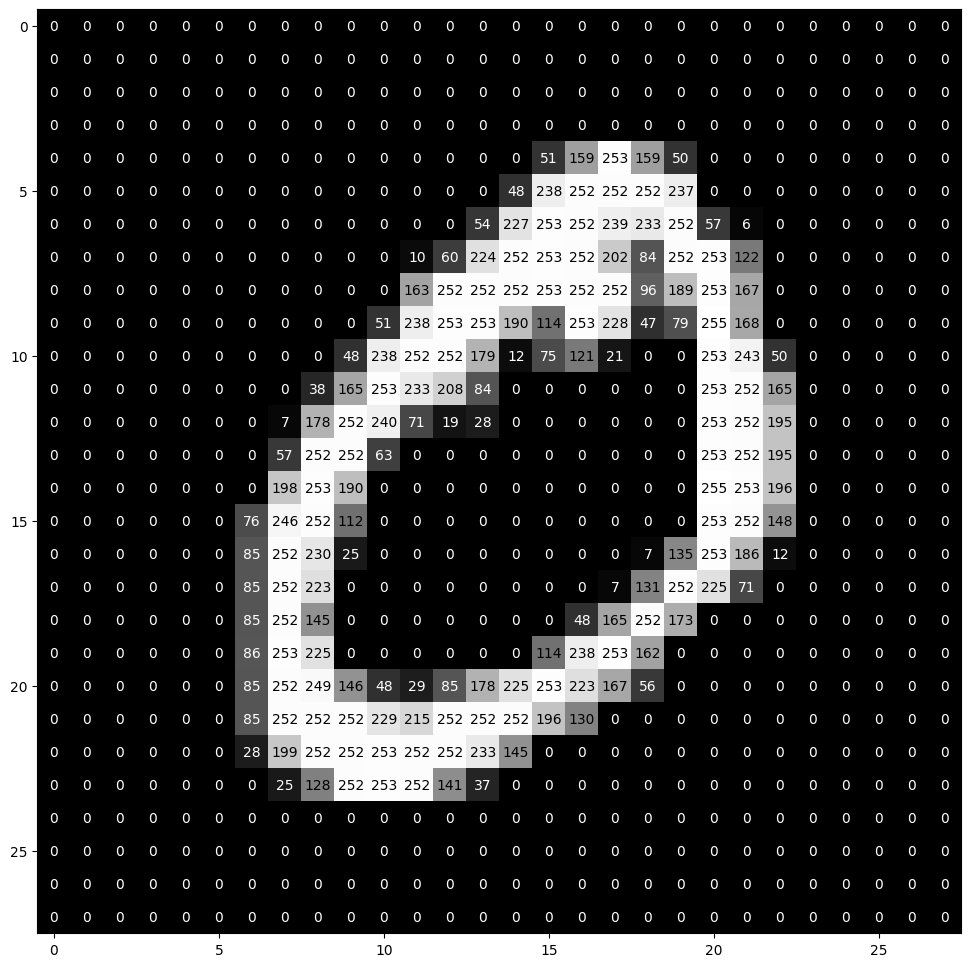

In [ ]:
def visualize_input(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max()/2.5
  for x in range(height):
    for y in range(height):
      ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if img[x][y]<thresh else 'black')
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot(111)
visualize_input(x_train[1].reshape(28,28),ax)


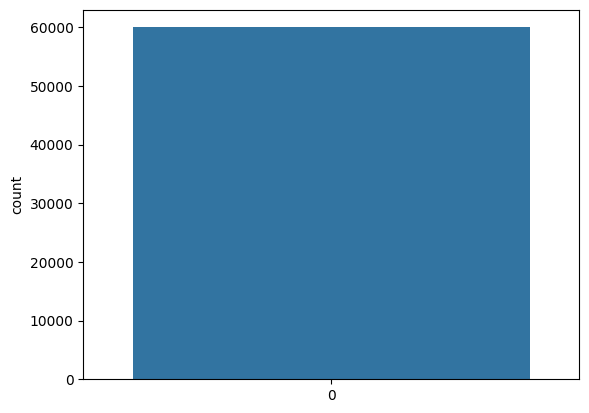

In [ ]:
import seaborn as sns
g = sns.countplot(y_train)

In [ ]:
#SIMPLE BASELINE NETWORK
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#flatten 28*28 images to 784 vector for each image
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape((x_train.shape[0], num_pixels)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], num_pixels)).astype('float32')

#normalize inputs from 0-255 to 0-1
x_train = x_train/255
x_test = x_test/255

#one hot encode outputs
y_train =np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]

def baseline_model():
  #create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  #Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

#build the model

model = baseline_model()
model.summary()

#fit the model

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=200, verbose=2)

scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline error: %.2f%%" %(100-scores[1]*100))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 784)               615440    
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
300/300 - 4s - loss: 0.2782 - accuracy: 0.9212 - val_loss: 0.1337 - val_accuracy: 0.9604 - 4s/epoch - 12ms/step
Epoch 2/30
300/300 - 3s - loss: 0.1111 - accuracy: 0.9683 - val_loss: 0.0970 - val_accuracy: 0.9713 - 3s/epoch - 11ms/step
Epoch 3/30
300/300 - 4s - loss: 0.0715 - accuracy: 0.9793 - val_loss: 0.0891 - val_accuracy: 0.9720 - 4s/epoch - 12ms/step
Epoch 4/30
300/300 - 3s - loss: 0.0505 - accuracy: 0.9856 - val_loss: 0.068

In [ ]:
#Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

#load data 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28,1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28,1)).astype('float32')

X_train = X_train /255
X_test = X_test /255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

#define a cnn
def baseline_model():
  model= Sequential()
  model.add(Conv2D(32,(5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model_simple = baseline_model()
model_simple.summary()

model_simple.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200)
scores = model_simple.evaluate(X_test, y_test, verbose=2)
print("CNN Error: %.2f%%"% (100-scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
#Large CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28,1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28,1)).astype('float32')

X_train = X_train /255
X_test = X_test /255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

#define a cnn
def baseline_model():
  model= Sequential()
  model.add(Conv2D(30,(5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(15,(3,3), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
  
model_simple = baseline_model()
model_simple.summary()

model_simple.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200)
scores = model_simple.evaluate(X_test, y_test, verbose=2)
print("CNN Error: %.2f%%"% (100-scores[1]*100))

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 15)          0         
                                                         

In [ ]:
#Larger CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28,1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28,1)).astype('float32')

X_train = X_train /255
X_test = X_test /255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

#define a cnn
def baseline_model():
  model= Sequential()
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.1))
  model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.1))
  model.add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=2, padding='same'))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
  
model_simple = baseline_model()
model_simple.summary()

model_simple.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
scores = model_simple.evaluate(X_test, y_test, verbose=2)
print("CNN Error: %.2f%%"% (100-scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       147584    
                                                      